# Stock Market Analysis and Forecasting Demo

This notebook demonstrates data preprocessing, model training, forecasting, and portfolio optimization for TSLA, SPY, and BND stocks.

We will use the following classes from our project files:
- `StockDataProcessor` for Task 1
- `ModelTrainer` for Task 2
- `MarketForecaster` for Task 3
- `PortfolioOptimizer` for Task 4

In [1]:
import sys
sys.path.append('../scripts')

from data_preprocessing import StockDataProcessor
from time_series_models import ModelTrainer
from forecasting import MarketForecaster
from portfolio_optimization import PortfolioOptimizer

## Task 1: Data Preprocessing and Exploration

In this step, we will load and clean the stock data, perform exploratory data analysis, and compute some basic statistics.

In [2]:
# Initialize the data processor
tickers = ['TSLA', 'SPY', 'BND']
start_date = '2015-01-01'
end_date = '2023-01-01'
processor = StockDataProcessor(tickers, start_date, end_date)

# Download and clean data
processor.download_data()
processor.clean_data()
processor.basic_stats()  # Display basic statistics

[*********************100%***********************]  3 of 3 completed

Ticker          BND          SPY         TSLA
count   2014.000000  2014.000000  2014.000000
mean      69.841846   273.957763    88.662189
std        5.313988    85.302953   108.557913
min       62.453297   157.328644     9.578000
25%       65.801765   198.774593    16.217167
50%       67.369457   254.202118    21.881333
75%       74.876814   349.701195   182.904999
max       79.578087   458.720337   409.970001


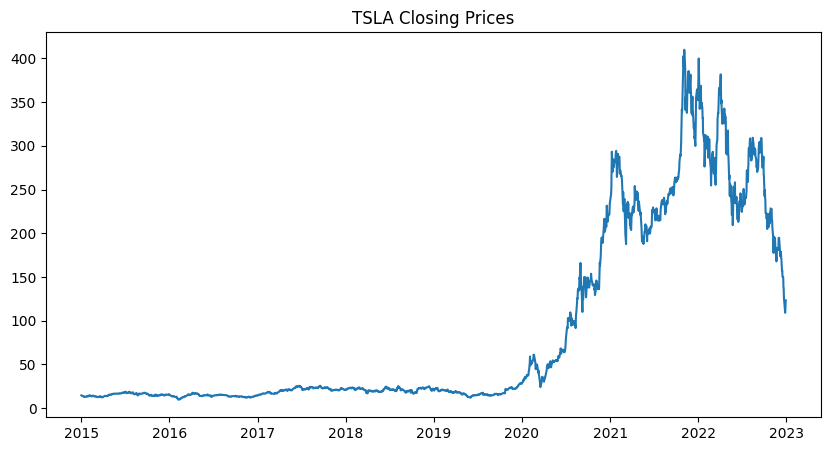

In [3]:
# Calculate daily returns and plot closing prices
processor.calculate_daily_returns()
processor.plot_closing_prices()

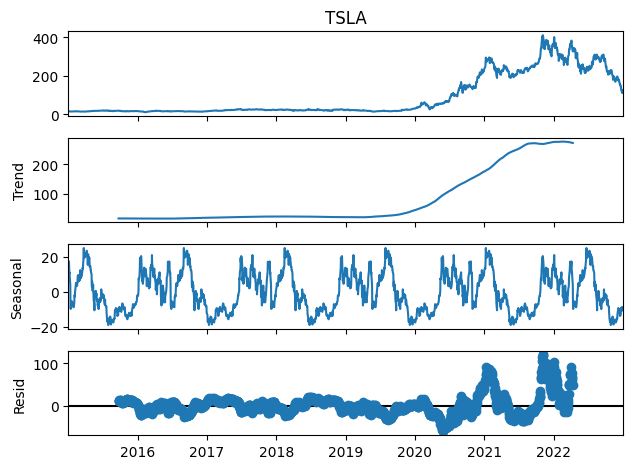

Sharpe Ratio: -0.23240196291637608


In [4]:
# Analyze volatility and decompose seasonality
rolling_mean, rolling_std = processor.analyze_volatility()
processor.decompose_seasonality()

# Calculate Sharpe Ratio
sharpe_ratio = processor.calculate_sharpe_ratio()
print(f'Sharpe Ratio: {sharpe_ratio}')

## Task 2: Model Training

In this step, we will train models for predicting future prices. We use ARIMA, SARIMA, and LSTM models to forecast TSLA stock prices.

c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A

Epoch 1/10
49/49 [==============================] - 5s 40ms/step - loss: 0.0072
Epoch 2/10
49/49 [==============================] - 2s 40ms/step - loss: 7.4147e-04
Epoch 3/10
49/49 [==============================] - 2s 41ms/step - loss: 6.3199e-04
Epoch 4/10
49/49 [==============================] - 2s 42ms/step - loss: 5.0639e-04
Epoch 5/10
49/49 [==============================] - 2s 41ms/step - loss: 5.7174e-04
Epoch 6/10
49/49 [==============================] - 2s 43ms/step - loss: 4.5456e-04
Epoch 7/10
49/49 [==============================] - 2s 41ms/step - loss: 4.1867e-04
Epoch 8/10
49/49 [==============================] - 2s 44ms/step - loss: 3.9438e-04
Epoch 9/10
49/49 [==============================] - 2s 43ms/step - loss: 4.0410e-04
Epoch 10/10
49/49 [==============================] - 2s 41ms/step - loss: 4.1691e-04


c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1/1 [==============================] - 0s 39ms/step
ARIMA MAE: 68.86445422149541
SARIMA MAE: 54.75083317571043
1/1 [==============================] - ETA: 0s

c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\Desktop\TenX\investment-trends-forecasting\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported inde

1/1 [==============================] - 0s 33ms/step
LSTM MAE: 71.05863326004066


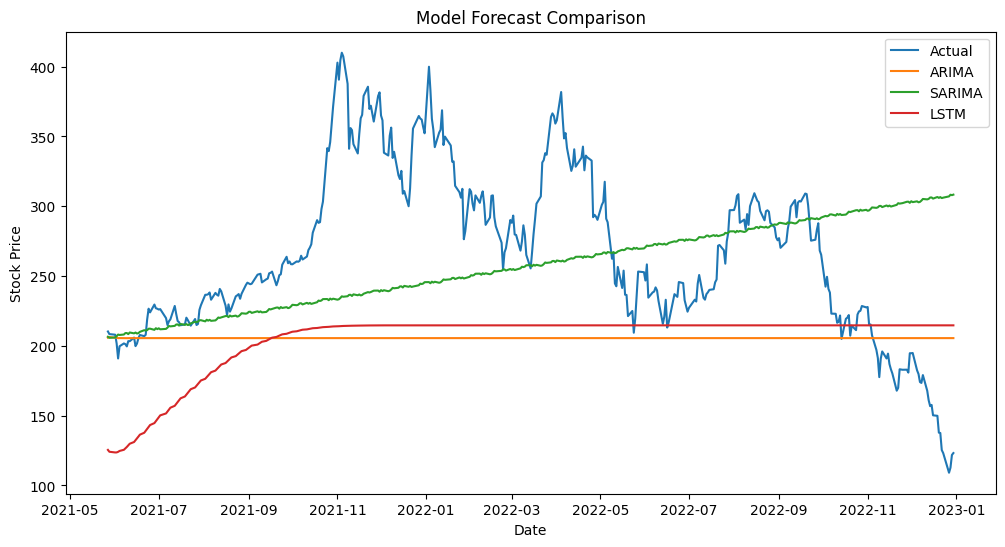

In [5]:
# Initialize model trainer
trainer = ModelTrainer(processor.data['TSLA'])

# Train models
arima_model = trainer.train_arima(order=(5, 1, 0))
sarima_model = trainer.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Prepare data and train LSTM model
X_train, y_train = trainer.prepare_lstm_data(sequence_length=60)
lstm_model = trainer.train_lstm(X_train, y_train, units=50, epochs=10, batch_size=32)

# Forecast with each model
arima_preds = arima_model.forecast(steps=len(trainer.test))
sarima_preds = sarima_model.forecast(steps=len(trainer.test))
lstm_preds = trainer.forecast_lstm(lstm_model)

# Evaluate models
print("ARIMA MAE:", trainer.evaluate_model(arima_model, model_type='arima', metric='mae'))
print("SARIMA MAE:", trainer.evaluate_model(sarima_model, model_type='sarima', metric='mae'))
print("LSTM MAE:", trainer.evaluate_model(lstm_model, model_type='lstm', metric='mae'))

# Plot forecast comparison
trainer.plot_forecasts(arima_preds, sarima_preds, lstm_preds)

## Task 3: Forecasting Future Market Trends

We use the trained LSTM model to forecast future prices and analyze the trends and risks.

In [6]:

# Check the type and first few rows of trainer.data
print(type(trainer.data))  # Should print <class 'pandas.Series'>
print(trainer.data.head())


<class 'pandas.core.series.Series'>
Date
2015-01-02 00:00:00+00:00    14.620667
2015-01-05 00:00:00+00:00    14.006000
2015-01-06 00:00:00+00:00    14.085333
2015-01-07 00:00:00+00:00    14.063333
2015-01-08 00:00:00+00:00    14.041333
Name: TSLA, dtype: float64


1/1 [==============================] - 0s 33ms/step


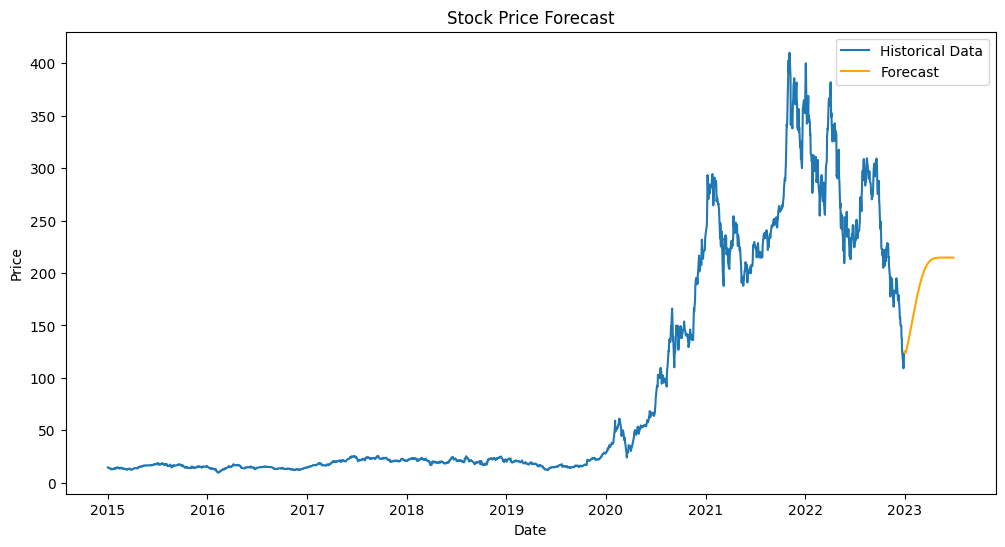

Forecast Analysis:
Mean Forecast Price: 192.95
Volatility (Standard Deviation): 29.32
Identified Trend: Upward Trend
High volatility detected. Caution advised for investors.
Potential market opportunity: Expected price increase.


In [7]:
# Initialize forecaster
forecaster = MarketForecaster(lstm_model, processor.data['TSLA'], trainer.scaler)

# Generate forecast for 6 months
predictions = forecaster.forecast(steps=180)

# Plot forecast
forecaster.plot_forecast(predictions)

# Analysis forecast
forecaster.analyze_forecast(predictions)

## Task 4: Portfolio Optimization

Using the forecasted data from Task 3, we will optimize a sample portfolio consisting of TSLA, SPY, and BND.

Optimal Portfolio Weights: [0.20321829 0.32761654 0.46916517]
Portfolio Summary:
  Expected Annual Return: 0.13
  Expected Portfolio Volatility: 0.16
  Optimized Sharpe Ratio: 0.82

Portfolio Weights Adjustment Rationale:
  - Allocate more to stable assets like BND if high volatility expected in TSLA.
  - Diversify with SPY to balance growth and risk.
Value at Risk (95%) for Tesla: 0.00


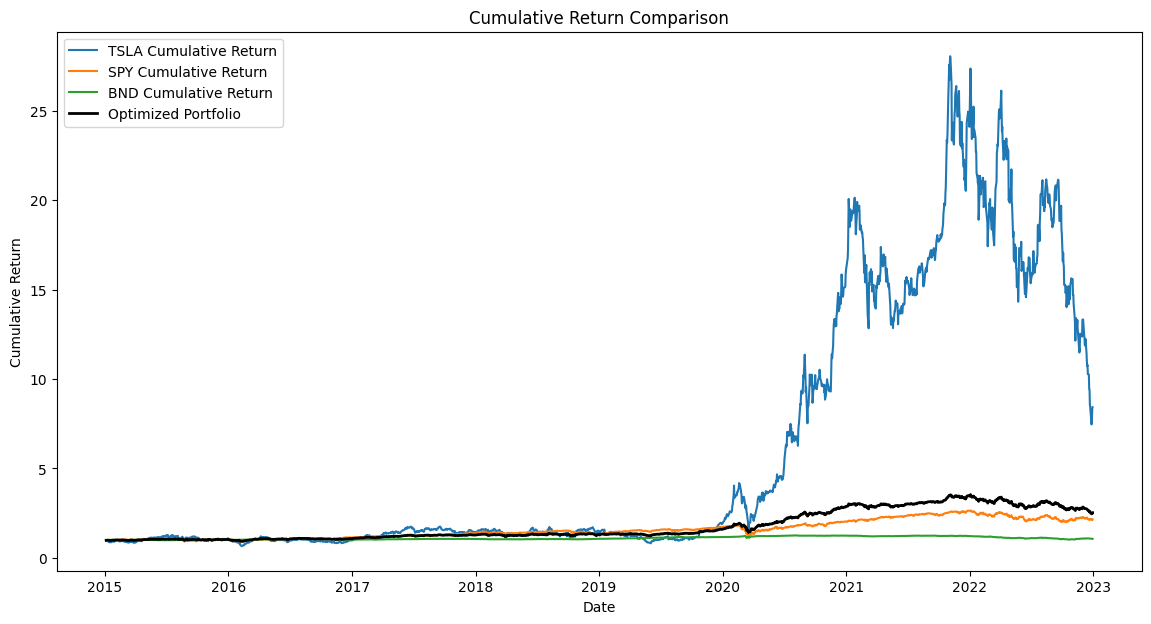

In [9]:
# Generate forecasted returns for each asset
forecasted_returns = processor.daily_returns[['TSLA', 'SPY', 'BND']]

# Initialize the PortfolioOptimizer with forecasted returns
optimizer = PortfolioOptimizer(forecasted_returns)

# Optimize portfolio
optimal_weights = optimizer.optimize_portfolio()
print('Optimal Portfolio Weights:', optimal_weights)

# Calculate risk-return metrics
optimizer.summarize_results(optimal_weights)

# Calculate Value at Risk for Tesla at a 95% confidence level
tesla_var_95 = optimizer.value_at_risk(asset='TSLA', confidence_level=0.05)
print(f"Value at Risk (95%) for Tesla: {tesla_var_95:.2f}")

# Calculate and plot cumulative returns
cumulative_returns, portfolio_cumulative_returns = optimizer.calculate_cumulative_returns(optimal_weights)
optimizer.plot_cumulative_returns(cumulative_returns, portfolio_cumulative_returns)


## Conclusion

This notebook demonstrated how to preprocess data, train forecasting models, generate future predictions, and optimize a portfolio. Each task was handled in a modular fashion, with classes that can be reused for similar analyses.